In [1]:
import pandas as pd

#Carico il dataset
df = pd.read_csv("C:\\Users\\mios9\\Desktop\\ESAME FINALE PYTHON EPICODE\\owid-covid-data.csv")

# Valuto dimensioni del dataset
print("Dimensioni del dataset:")
print(df.shape)

# Valuto Metadati del dataset
print("Metadati del dataset:")
print(df.info())

Dimensioni del dataset:
(409562, 67)
Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409562 entries, 0 to 409561
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409562 non-null  object 
 1   continent                                   389975 non-null  object 
 2   location                                    409562 non-null  object 
 3   date                                        409562 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_

In [8]:
#Verifico i nomi delle colonne del dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
# Filtrare le righe con continenti validi
df_continents = df.dropna(subset=['continent']).copy()
df_continents.loc[:, 'total_cases'] = df_continents['total_cases'].fillna(0)

# Calcolare il numero di casi totali per continente
cases_per_continent = df_continents.groupby('continent')['total_cases'].sum()

print(cases_per_continent)

continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


In [6]:
import numpy as np

# Variabili contenenti i nomi dei continenti
continent1 = 'Europe'
continent2 = 'Asia'

# Filtrare i dati per i due continenti
continent1_data = df_continents[df_continents['continent'] == continent1]['total_cases'].dropna()
continent2_data = df_continents[df_continents['continent'] == continent2]['total_cases'].dropna()

# Calcolare i descrittori statistici
stats = {
    continent1: {
        'max': continent1_data.max(),
        'mean': continent1_data.mean(),
        'percentage': (continent1_data.sum() / df_continents['total_cases'].sum()) * 100
    },
    continent2: {
        'max': continent2_data.max(),
        'mean': continent2_data.mean(),
        'percentage': (continent2_data.sum() / df_continents['total_cases'].sum()) * 100
    }
}
print(stats)

{'Europe': {'max': '38,997,490', 'mean': '2,545,299', 'percentage': '33.11%'}, 'Asia': {'max': '99,361,338', 'mean': '2,938,129', 'percentage': '35.03%'}}


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='total_cases'>

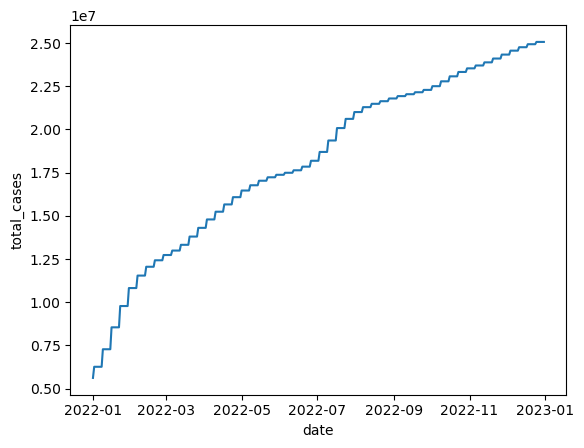

In [11]:
import seaborn as sns
# Converti la colonna 'date' in tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Filtra i dati per l'Italia nel 2022
italy_data_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]

# Grafico per casi totali rispetto alla data
sns.lineplot(x='date', y='total_cases', data=italy_data_2022)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

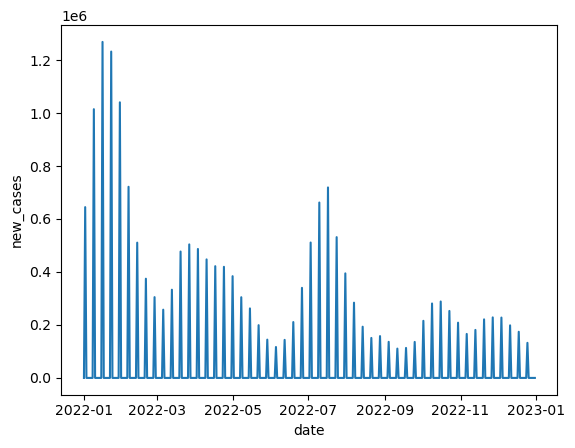

In [12]:
# Grafico per nuovi casi rispetto alla data
sns.lineplot(x='date', y='new_cases', data=italy_data_2022)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date'>

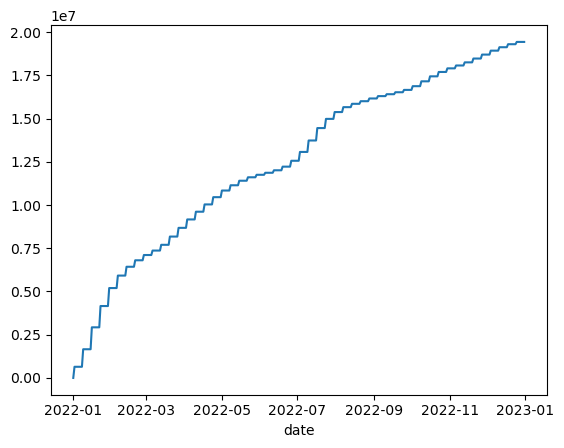

In [13]:
#Grafico per somma cumulativa nuovi casi nel 2022
italy_cumulative_new_cases = italy_data_2022.groupby('date')['new_cases'].sum().cumsum()
sns.lineplot(x=italy_cumulative_new_cases.index, y=italy_cumulative_new_cases.values)

<Axes: xlabel='location', ylabel='icu_patients'>

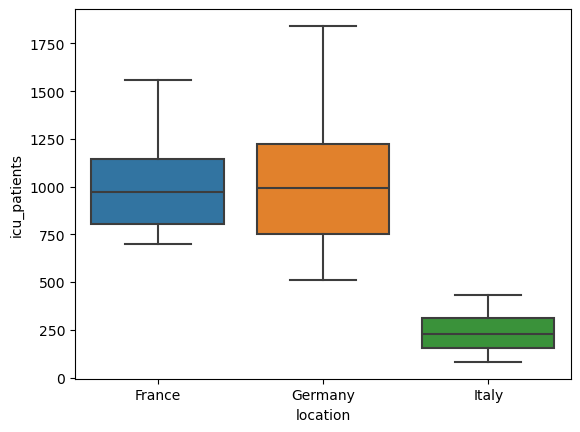

In [15]:
# Filtra i dati per Italia, Germania e Francia da maggio 2022 ad aprile 2023
countries = ['Italy', 'Germany', 'France']
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_data = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Boxplot della differenza per ICU
sns.boxplot(x='location', y='icu_patients', data=filtered_data)

#Commento: Il boxplot ci mostra come in Italia ci fossero meno pazienti in terapia intensiva rispetto a Francia e Germania che hanno mantenuto, nel periodo analizzato, una media e picchi superiori rispetto al nostro paese per quello che riguarda la pressione ospedaliera. Cioò può essere dovuto non tanto alla maggiore forza del virus, quanto ad una diversa gestione della pandemia fra le diverse Nazioni. 

In [25]:
#Analisi Italia, Germania, Francia e Spagna nel 2023
countries = ['Italy', 'Germany', 'France', 'Spain']
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filtro per paesi e data specificata
filtered_data = df[(df['location'].isin(countries)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

#Somma dei pazienti ricoverati per ciascun paese
sum_hosp_patients = filtered_data.groupby('location')['hosp_patients'].sum()

# Visualizza la somma dei pazienti ricoverati per ogni paese
print("Somma dei pazienti ricoverati per ogni paese nel 2023:")
print(sum_hosp_patients)

# Conteggio dei valori nulli 
null_counts= filtered_data['hosp_patients'].isnull().groupby(filtered_data['location']).sum()

# Visualizza il conteggio dei valori nulli per i pazienti ospitalizzati per ogni paese
print("Conteggio dei valori nulli nelle colonne relative ai ricoveri")
print(null_counts)

#Gestione dati nulli
#La sostituzione dei dati nulli può essere appropriata se i nulli rappresentano dati mancanti occasionali e la loro sostituzione non compromette la veridicità dell'analisi.
#Se i dati nulli sono frequenti e rappresentano una parte significativa del dataset, la sostituzione potrebbe distorcere i risultati. In questi casi, potrebbe essere meglio analizzare il motivo dei nulli e considerare approcci alternativi come l'analisi dei dati con i nulli intatti

Somma dei pazienti ricoverati per ogni paese nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
Conteggio dei valori nulli nelle colonne relative ai ricoveri
location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients, dtype: int64
